In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('C:/Users/brian/Downloads/archive (1)/emails.csv')


In [5]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.drop(columns='Email No.', inplace=True)
dataset = df.values

In [7]:
df.shape

(5172, 3001)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3001 entries, the to Prediction
dtypes: int64(3001)
memory usage: 118.4 MB


In [9]:
df.dtypes

the           int64
to            int64
ect           int64
and           int64
for           int64
              ...  
military      int64
allowing      int64
ff            int64
dry           int64
Prediction    int64
Length: 3001, dtype: object

In [10]:
df.dtypes!='int64'

the           False
to            False
ect           False
and           False
for           False
              ...  
military      False
allowing      False
ff            False
dry           False
Prediction    False
Length: 3001, dtype: bool

In [11]:
sum(df.dtypes!='int64')

0

In [12]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


Hay que normalizar

In [13]:
df[df.columns[-1]].unique()

array([0, 1], dtype=int64)

In [14]:
df.groupby(df.columns[-1]).size()

Prediction
0    3672
1    1500
dtype: int64

In [15]:
total_muestras = df.shape[0]
clase_0 = 3672
clase_1 = 1500

print(f"la clase 0 tiene un {round((clase_0*100)/total_muestras)}%")
print(f"la clase 1 tiene un {round((clase_1*100)/total_muestras)}%")

la clase 0 tiene un 71%
la clase 1 tiene un 29%


Esta desbalanceada

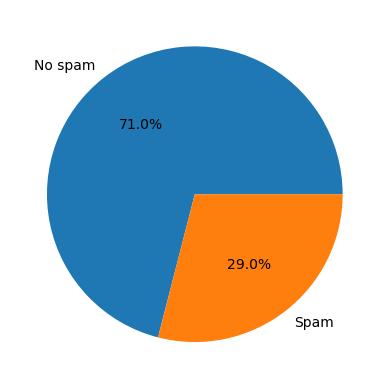

In [16]:
labels = ['No spam', 'Spam']
size = [(clase_0*100)/total_muestras, (clase_1*100)/total_muestras]
fig, ax = plt.subplots()
ax.pie(size, labels=labels, autopct='%1.1f%%')
plt.show()

In [17]:
X = dataset[:,:-1]
y = dataset[:,-1:]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, random_state=0, test_size=0.2)
print(f"el tamaño de X_train es de: {X_train.shape}")
print(f"el tamaño de X_test es de: {X_test.shape}")
print(f"el tamaño de y_train es de: {y_train.shape}")
print(f"el tamaño de y_train es de: {y_test.shape}")

el tamaño de X_train es de: (4137, 3000)
el tamaño de X_test es de: (1035, 3000)
el tamaño de y_train es de: (4137, 1)
el tamaño de y_train es de: (1035, 1)


In [19]:
def normalizacion (x):
    x_normalizada = (x-X_train.min())/(X_train.max()-X_train.min())
    return x_normalizada

In [20]:
X_train_normalizada = normalizacion(X_train)
X_test_normalizada = normalizacion(X_test)

In [21]:
kfold = KFold(n_splits=10, random_state=0, shuffle=True)

In [22]:
models = []
models.append(('LoR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    cv_results = cross_val_score(model, X_train_normalizada, y_train, cv=kfold, scoring=scoring)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100:.2f}% ({cv_results.std()*100:.2f}%)")

LoR: 71.74% (2.33%)
LDA: 70.41% (2.69%)
KNN: 86.03% (1.25%)
CART: 92.34% (1.02%)
RF: 97.05% (0.88%)
NB: 95.12% (1.18%)
SVM: 79.89% (1.63%)


In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
print(dfscores)

                0
0        2.099367
1      232.118330
2     2916.057301
3      803.818986
4        0.348715
...           ...
2995    16.400743
2996    63.829543
2997     0.843236
2998   802.004211
2999     0.280059

[3000 rows x 1 columns]


In [25]:
dfcolumns = pd.DataFrame(df.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(500,'Score'))  #print 10 best features

        Specs         Score
14          i  20933.845216
23          s   9905.907062
173         r   9581.168541
6           a   8297.355495
138         o   7767.524289
...       ...           ...
360     susan    130.158345
1542  popular    129.356532
1475  revenue    129.206383
229     smith    129.024640
1337  express    128.753518

[500 rows x 2 columns]


[6.21336748e-03 1.97294550e-03 3.52720775e-03 ... 0.00000000e+00
 1.71297584e-03 8.64517002e-06]


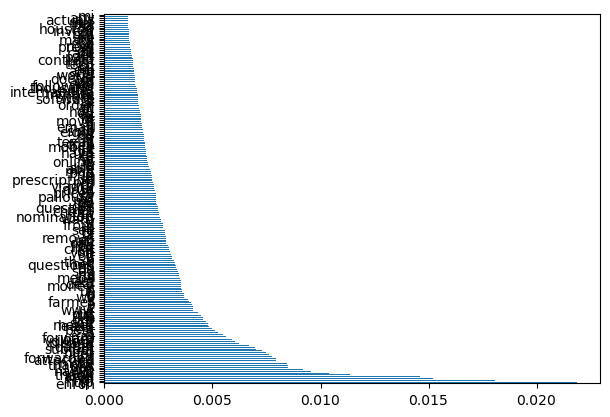

In [26]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=df.columns[:-1])
feat_importances.nlargest(200).plot(kind='barh')
plt.show()

In [27]:
select = SelectKBest(score_func=chi2, k=100)
z = select.fit_transform(X,y)
print("After selecting best 3 features:", z.shape)

filter = select.get_support()
features = df.columns[:-1]
 
print("All features:")
print(features)
 
print("Selected best 100:")
print(features[filter])
print(z)

X_ft = df[features[filter]]
X_ft

After selecting best 3 features: (5172, 100)
All features:
Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'enhancements', 'connevey', 'jay', 'valued', 'lay', 'infrastructure',
       'military', 'allowing', 'ff', 'dry'],
      dtype='object', length=3000)
Selected best 100:
Index(['ect', 'and', 'of', 'a', 'hou', 'in', 'is', 'enron', 'i', 'your', 'at',
       's', 'it', 'com', 'or', 'deal', 'meter', 'hpl', 're', 'e', 'our', 'd',
       'an', 't', 'daren', 'l', 'm', 'us', 'http', 'www', 'b', 'p', 'o', 'c',
       'font', 'r', 'statements', 'w', 'x', 'nbsp', 'height', 'f', 'stock',
       'co', 'u', 'pills', 'size', 'n', 'subject', 've', 'g', 'able', 'id',
       'news', 'v', 'nd', 'st', 'xp', 'y', 'ic', 'soft', 'pro', 'oo', 'ali',
       'statement', 'al', 'men', 'la', 'sec', 'ca', 'td', 'dr', 'pill', 'z',
       'q', 'invest', 'gra', 'gr', 'mo', 'tr', 'ce', 'ad', 'ti', 'ft', 'pi',
       'hp', 'eight', 'em', 'pa', 'ii', 'ma', 'ct', 'ut', 'sp', 

,ect,and,of,a,hou,in,is,enron,i,your,...,ma,ct,ut,sp,le,der,ur,aren,tm,ff
0,1,0,0,2,0,0,1,0,2,0,...,1,2,0,0,0,0,1,0,1,0
1,24,6,2,102,27,18,13,1,61,0,...,8,28,2,0,3,0,24,3,0,1
2,1,0,0,8,0,4,0,0,8,0,...,0,1,0,0,0,0,0,0,0,0
3,22,0,1,51,10,1,9,0,16,0,...,3,22,0,0,1,0,1,2,0,0
4,17,1,2,57,9,3,2,0,30,0,...,3,21,1,0,4,0,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,3,0,32,0,5,1,0,20,0,...,2,5,1,0,2,0,2,1,0,0
5168,11,2,5,151,3,23,6,1,98,1,...,5,16,9,3,12,1,6,1,0,1
5169,1,1,0,11,0,1,3,0,10,0,...,2,1,0,1,0,0,0,0,0,0
5170,1,0,1,28,0,8,7,0,39,1,...,1,5,1,1,4,1,5,0,0,1


In [28]:
X_train_ft_normalizada = normalizacion(X_ft)
X_train_ft_normalizada

,ect,and,of,a,hou,in,is,enron,i,your,...,ma,ct,ut,sp,le,der,ur,aren,tm,ff
0,0.000430,0.000000,0.000000,0.000859,0.000000,0.000000,0.000430,0.00000,0.000859,0.00000,...,0.000430,0.000859,0.000000,0.000000,0.000000,0.00000,0.000430,0.000000,0.00043,0.00000
1,0.010314,0.002578,0.000859,0.043833,0.011603,0.007735,0.005587,0.00043,0.026214,0.00000,...,0.003438,0.012033,0.000859,0.000000,0.001289,0.00000,0.010314,0.001289,0.00000,0.00043
2,0.000430,0.000000,0.000000,0.003438,0.000000,0.001719,0.000000,0.00000,0.003438,0.00000,...,0.000000,0.000430,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000
3,0.009454,0.000000,0.000430,0.021917,0.004297,0.000430,0.003868,0.00000,0.006876,0.00000,...,0.001289,0.009454,0.000000,0.000000,0.000430,0.00000,0.000430,0.000859,0.00000,0.00000
4,0.007306,0.000430,0.000859,0.024495,0.003868,0.001289,0.000859,0.00000,0.012892,0.00000,...,0.001289,0.009024,0.000430,0.000000,0.001719,0.00000,0.002149,0.000430,0.00000,0.00043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,0.000859,0.001289,0.000000,0.013752,0.000000,0.002149,0.000430,0.00000,0.008595,0.00000,...,0.000859,0.002149,0.000430,0.000000,0.000859,0.00000,0.000859,0.000430,0.00000,0.00000
5168,0.004727,0.000859,0.002149,0.064890,0.001289,0.009884,0.002578,0.00043,0.042114,0.00043,...,0.002149,0.006876,0.003868,0.001289,0.005157,0.00043,0.002578,0.000430,0.00000,0.00043
5169,0.000430,0.000430,0.000000,0.004727,0.000000,0.000430,0.001289,0.00000,0.004297,0.00000,...,0.000859,0.000430,0.000000,0.000430,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000
5170,0.000430,0.000000,0.000430,0.012033,0.000000,0.003438,0.003008,0.00000,0.016760,0.00043,...,0.000430,0.002149,0.000430,0.000430,0.001719,0.00043,0.002149,0.000000,0.00000,0.00043


In [29]:
models = []
models.append(('LoR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    cv_results = cross_val_score(model, X_train_ft_normalizada, y, cv=kfold, scoring=scoring)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100:.2f}% ({cv_results.std()*100:.2f}%)")

LoR: 72.02% (1.70%)
LDA: 82.48% (1.48%)
KNN: 84.53% (1.17%)
CART: 89.98% (0.63%)
RF: 94.10% (1.20%)
NB: 79.74% (1.66%)
SVM: 77.78% (0.80%)


In [30]:
list(np.arange(0,500,50))

[0, 50, 100, 150, 200, 250, 300, 350, 400, 450]

In [31]:
param_grid = [{'n_estimators': list(np.arange(0,500,50)), 'criterion': ['gini', 'entropy', 'log_loss']}]
RF = RandomForestClassifier()
grid_search = GridSearchCV(RF, param_grid, cv=5,scoring='accuracy',return_train_score=True)
grid_search.fit(X_train_normalizada, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'n_estimators': [0, 50, 100, 150, 200, 250, 300, 350,
                                           400, 450]}],
             return_train_score=True, scoring='accuracy')

In [32]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'n_estimators': 250}


In [33]:
param_grid = [{'n_estimators': list(np.arange(100,500,50)), 'criterion': ['gini', 'entropy', 'log_loss']}]
rand_search = RandomizedSearchCV(RF, param_grid, n_iter=15, cv=5,scoring='accuracy',return_train_score=True)
rand_search.fit(X_train_normalizada, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions=[{'criterion': ['gini', 'entropy',
                                                       'log_loss'],
                                         'n_estimators': [100, 150, 200, 250,
                                                          300, 350, 400,
                                                          450]}],
                   return_train_score=True, scoring='accuracy')

In [34]:
rand_search.cv_results_
rand_search.best_params_

{'n_estimators': 150, 'criterion': 'entropy'}

In [35]:
model = RandomForestClassifier(n_estimators=350, criterion='entropy')
model.fit(X_train_normalizada, y_train)
y_predict = model.predict(X_test_normalizada)

In [36]:
#metrics
Accuracy = round(metrics.accuracy_score(y_test, y_predict),2)
Precision = round(metrics.precision_score(y_test, y_predict),2)
Sensitivity_recall = round(metrics.recall_score(y_test, y_predict),2)
Specificity = round(metrics.recall_score(y_test, y_predict, pos_label=0),2)
F1_score = round(metrics.f1_score(y_test, y_predict),2)
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.97, 'Precision': 0.95, 'Sensitivity_recall': 0.96, 'Specificity': 0.98, 'F1_score': 0.95}


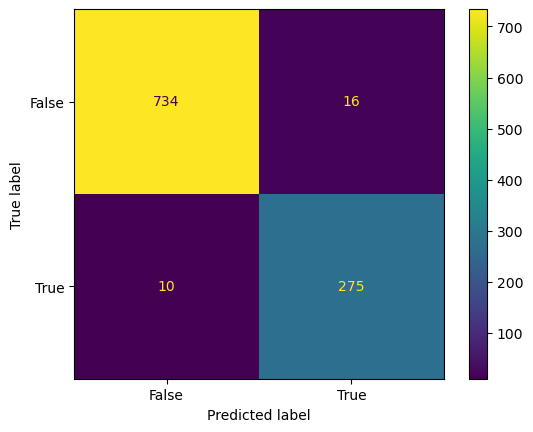

In [37]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [38]:
from keras.models import Sequential
from keras.layers import Dense


In [39]:
red_neuronal = Sequential()
red_neuronal.add(Dense(50, input_dim = X.shape[1], activation = 'relu'))
red_neuronal.add(Dense(30, activation = 'relu'))
red_neuronal.add(Dense(30, activation = 'relu'))
red_neuronal.add(Dense(1, activation = 'sigmoid'))
red_neuronal.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
red_neuronal.fit(X_train_normalizada, y_train, validation_data=(X_test, y_test), epochs = 150, batch_size=20)

Epoch 1/150
207/207 [==============================] - 3s 7ms/step - loss: 0.6084 - accuracy: 0.7075 - val_loss: 33.4590 - val_accuracy: 0.4309
Epoch 2/150
207/207 [==============================] - 1s 6ms/step - loss: 0.5036 - accuracy: 0.7476 - val_loss: 19.0423 - val_accuracy: 0.9362
Epoch 3/150
207/207 [==============================] - 1s 5ms/step - loss: 0.3070 - accuracy: 0.8649 - val_loss: 32.9628 - val_accuracy: 0.9440
Epoch 4/150
207/207 [==============================] - 1s 4ms/step - loss: 0.1874 - accuracy: 0.9408 - val_loss: 52.2923 - val_accuracy: 0.9401
Epoch 5/150
207/207 [==============================] - 1s 4ms/step - loss: 0.1359 - accuracy: 0.9565 - val_loss: 36.8677 - val_accuracy: 0.9565
Epoch 6/150
207/207 [==============================] - 1s 5ms/step - loss: 0.1076 - accuracy: 0.9671 - val_loss: 49.6556 - val_accuracy: 0.9488
Epoch 7/150
207/207 [==============================] - 1s 4ms/step - loss: 0.0918 - accuracy: 0.9700 - val_loss: 42.4766 - val_accuracy:

In [61]:
y_pred = red_neuronal.predict(X_test).astype('int64')

33/33 [==============================] - 0s 3ms/step


In [63]:
Accuracy = round(metrics.accuracy_score(y_test, y_pred),2)
Precision = round(metrics.precision_score(y_test, y_pred),2)
Sensitivity_recall = round(metrics.recall_score(y_test, y_pred),2)
Specificity = round(metrics.recall_score(y_test, y_pred, pos_label=0),2)
F1_score = round(metrics.f1_score(y_test, y_pred),2)
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.96, 'Precision': 0.97, 'Sensitivity_recall': 0.9, 'Specificity': 0.99, 'F1_score': 0.93}
